# 기출1회 - 통계분석

### 1. 회귀분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 데이터불러오기
# import mglearn
# X,y = mglearn.datasets.load_extended_boston()
from sklearn.datasets import load_boston
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['price'] =  boston.target

C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


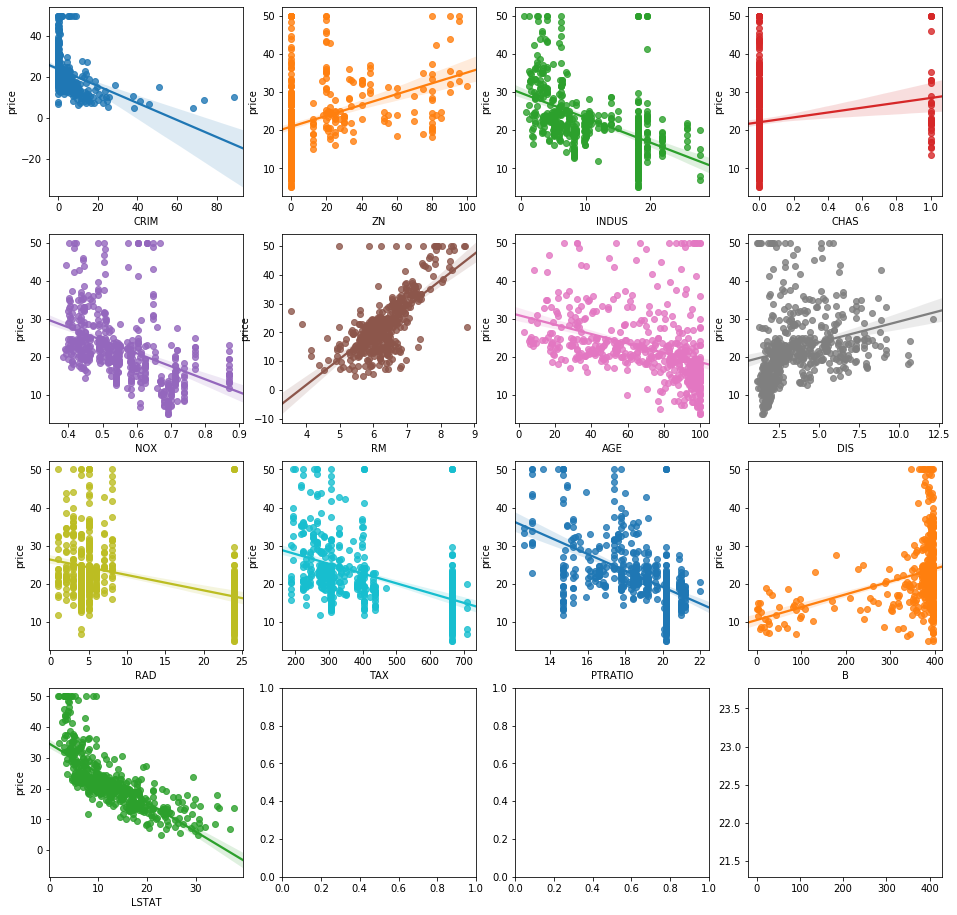

In [21]:
fig, axs = plt.subplots(figsize=(16,16), ncols=4, nrows=4) # 4*4 행 열 가진 subplots 이용, axs는 4*4 의 ax가짐
for i, feature in enumerate(bostonDF.columns[:-1]):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='price', data=bostonDF, ax=axs[row][col]) # regplot이용해 산점도와 선형회귀직선 함께 표현

### 간략한 EDA
 - 결측X
 - 선형 : RM(거주할수있는 방개수), LSTAT(하위계층의비율) 와 price와의 선형관계 두드러짐
     - 방개수RM이 증가할수록 주택가격 비쌈
     - 하위계층비율 낮을수록 주택가격 비쌈

### (1) 데이터 8:2 분할, 선형회귀, 결정계수, rmse : price-target

In [86]:
# 전처리 안해두되나?

from sklearn.model_selection import train_test_split
x = np.array(bostonDF.drop('price',axis=1))
y = np.array(bostonDF['price'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# 예측/모델링
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# 평가
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, pred)
print('선형회귀 결정계수: ', np.round(lr.score(X_test, y_test),2))
print('RMSE: ', np.round(np.sqrt(mse),2))

선형회귀 결정계수:  0.76
RMSE:  4.24


### (2) 데이터 8:2 분할, 릿지 회귀, alpha 0 ~ 1까지 0.1단위로 탐색, 결정계수높을때로 모델학습 결정계수와 rmse 계산

In [64]:
alpha = np.arange(0,1.1, 0.1)

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge(normalize=True)

# 파라미터를 딕셔너리 형태로 설정
parameters = {'alpha':alpha}
grid_ridge = GridSearchCV(ridge, param_grid=parameters, refit=True) 

# 모델링
grid_ridge.fit(X_train, y_train)

# grid search 결과를 추출해 data frame변환
scores_df = pd.DataFrame(grid_ridge.cv_results_)
scores_df[['params','mean_test_score', 'rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'alpha': 0.0},0.689260,1,0.723017,0.598672,0.801111
1,{'alpha': 0.1},0.684613,2,0.745138,0.589787,0.792919
2,{'alpha': 0.2},0.675654,3,0.750720,0.579393,0.777234
3,{'alpha': 0.30000000000000004},0.665670,4,0.750259,0.569406,0.760737
4,{'alpha': 0.4},0.655287,5,0.746634,0.559786,0.744388
5,{'alpha': 0.5},0.644819,6,0.741158,0.550506,0.728518
6,{'alpha': 0.6000000000000001},0.634448,7,0.734555,0.541566,0.713264
7,{'alpha': 0.7000000000000001},0.624283,8,0.727260,0.532970,0.698678
8,{'alpha': 0.8},0.614388,9,0.719552,0.524715,0.684767
9,{'alpha': 0.9},0.604795,10,0.711616,0.516797,0.671517


In [65]:
print('grid search 최적 파라미터: ', grid_ridge.best_params_)
print('grid search 최고정확도:{0:.3f}'.format(grid_ridge.best_score_))

grid search 최적 파라미터:  {'alpha': 0.0}
grid search 최고정확도:0.689


In [83]:
# 예측
pred = grid_ridge.predict(X_test)

# 평가 (r2 = 회귀선 설명력)
print('grid search RMS:', np.round(np.sqrt(mean_squared_error(y_test, pred)),2))
print('grid search variance score: {0:.3f}'.format(r2_score(y_test, pred)))

grid search RMS: 4.45
grid search variance score: 0.755


### 2. 다항 회귀분석 시각화

In [87]:
# 단순 선형회귀를 다항 3차까지 적용시켜 계수 구하고 3차항 적용한 모델의 스캐터 플롯과 기울기 선을 그리시오

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 3 * X **3 + X**2 + 2*X + 2 + np.random.randn(m,1)
line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)

In [99]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_reg.fit_transform(X)


from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
print("다항식 회귀계수:",reg.coef_)

다항식 회귀계수: [[2.04882641 0.95277562 3.00793086]]


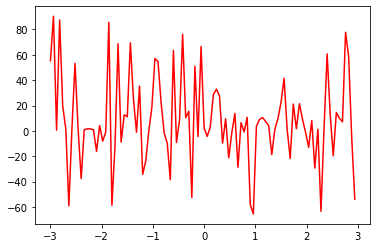

In [101]:
plt.plot(line, reg.predict(X_poly), c='r')

In [102]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3, include_bias=False)
poly_reg.fit(X)
X_poly = poly_reg.transform(X)
line_poly = poly_reg.transform(line)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

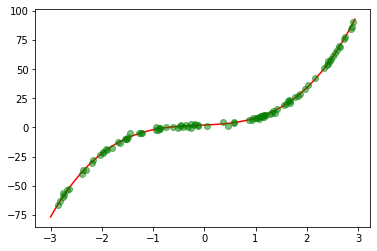

In [106]:
plt.plot(line, reg.predict(line_poly), c='r')
plt.plot(X, y, 'o',c='g', alpha=0.5)